In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cardio_train.csv', sep = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


DATA PREPROCESSING

In [ ]:
df.shape

(70000, 13)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
df = df.drop(columns = ['ap_hi', 'ap_lo', 'gluc', 'smoke', 'alco', 'cardio'])
df.head()

,id,age,gender,height,weight,cholesterol,active
0,0,18393,2,168,62.0,1,1
1,1,20228,1,156,85.0,3,1
2,2,18857,1,165,64.0,3,0
3,3,17623,2,169,82.0,1,1
4,4,17474,1,156,56.0,1,0


In [ ]:
df['age'] = (df['age'] / 365).round().astype(int)
df.head()

,id,age,gender,height,weight,cholesterol,active
0,0,50,2,168,62.0,1,1
1,1,55,1,156,85.0,3,1
2,2,52,1,165,64.0,3,0
3,3,48,2,169,82.0,1,1
4,4,48,1,156,56.0,1,0


In [ ]:
df['active'] = df['active'].apply(lambda x: np.random.randint(1, 5) if x == 1 else 0)
df.head()

,id,age,gender,height,weight,cholesterol,active
0,0,50,2,168,62.0,1,3
1,1,55,1,156,85.0,3,3
2,2,52,1,165,64.0,3,0
3,3,48,2,169,82.0,1,2
4,4,48,1,156,56.0,1,0


In [ ]:
df['gender'] = df['gender'].astype('category')
df['cholesterol'] = df['cholesterol'].astype('category')
df['active'] = df['active'].astype('category')
df.head()

,id,age,gender,height,weight,cholesterol,active
0,0,50,2,168,62.0,1,3
1,1,55,1,156,85.0,3,3
2,2,52,1,165,64.0,3,0
3,3,48,2,169,82.0,1,2
4,4,48,1,156,56.0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           70000 non-null  int64   
 1   age          70000 non-null  int64   
 2   gender       70000 non-null  category
 3   height       70000 non-null  int64   
 4   weight       70000 non-null  float64 
 5   cholesterol  70000 non-null  category
 6   active       70000 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 2.3 MB


EXPLORATORY DATA ANALYSIS

In [ ]:
df.describe()

,id,age,height,weight
count,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,164.359229,74.205690
std,28851.302323,6.765294,8.210126,14.395757
min,0.000000,30.000000,55.000000,10.000000
25%,25006.750000,48.000000,159.000000,65.000000
50%,50001.500000,54.000000,165.000000,72.000000
75%,74889.250000,58.000000,170.000000,82.000000
max,99999.000000,65.000000,250.000000,200.000000


<Axes: >

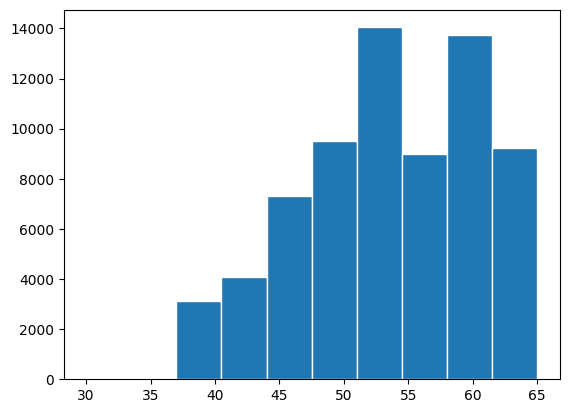

In [ ]:
df['age'].hist(edgecolor = "white", grid = False)

In [ ]:
age_count = df['age'].value_counts().sort_index().reset_index()
age_count.columns = ['Age', 'Frequency']
age_count

,Age,Frequency
0,30,4
1,39,409
2,40,2700
3,41,766
4,42,2624
5,43,690
6,44,2837
7,45,757
8,46,2955
9,47,754


<Axes: ylabel='count'>

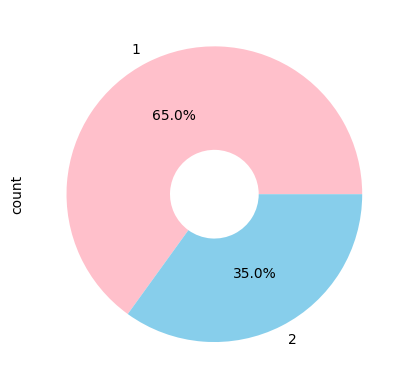

In [ ]:
df.gender.value_counts().plot(kind = "pie" , autopct = '%1.1f%%', colors = ["pink" , "skyblue"],
                              wedgeprops = dict(width = 0.7))

<ipython-input-16-8cb9f8926a54>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'gender', palette = ['pink', 'skyblue'])


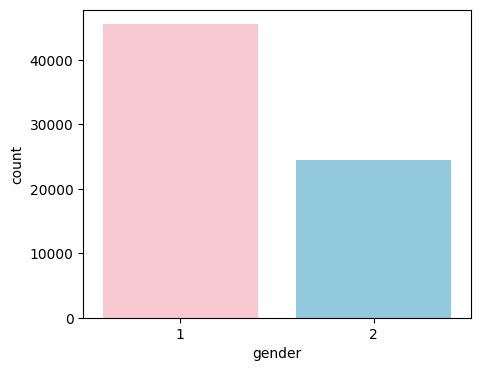

In [ ]:
plt.figure(figsize = (5, 4))
sns.countplot(data = df, x = 'gender', palette = ['pink', 'skyblue'])
plt.show()

In [ ]:
gender_count = df['gender'].value_counts().sort_index().reset_index()
gender_count.columns = ['Gender', 'Frequency']
gender_count

,Gender,Frequency
0,1,45530
1,2,24470


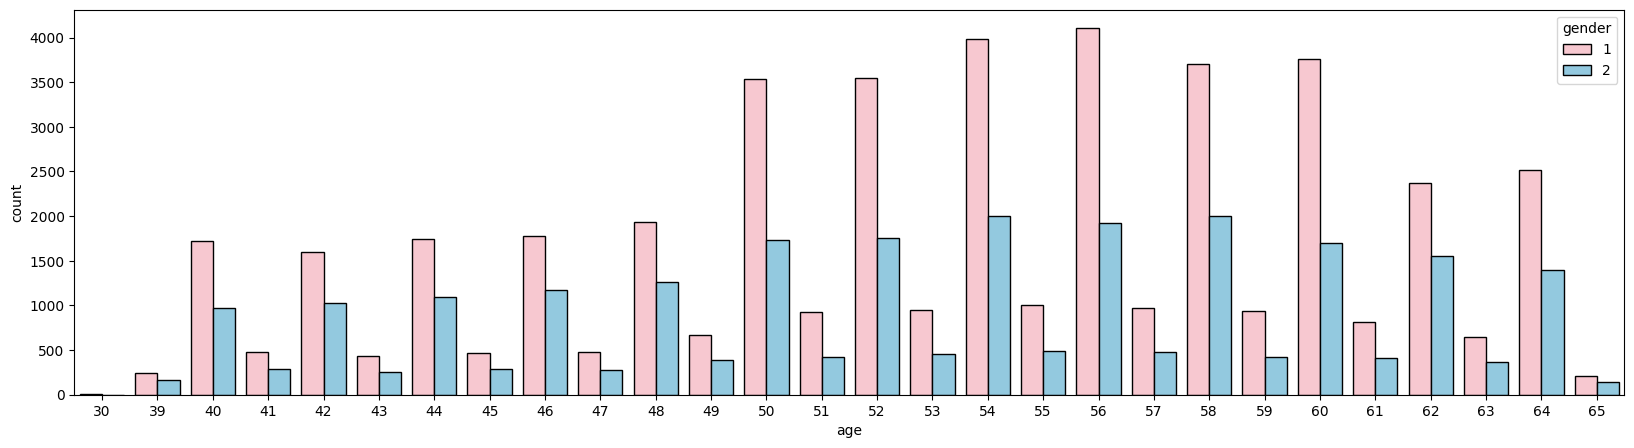

In [ ]:
plt.figure(figsize = (20, 5))
sns.countplot(data = df, x = 'age', hue = 'gender', palette = ['pink', 'skyblue'], edgecolor = 'black')
plt.show()

In [ ]:
age_count = df.groupby('gender')['age'].value_counts().unstack(fill_value = 0)
age_count

<ipython-input-19-c3e522dac2bc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_count = df.groupby('gender')['age'].value_counts().unstack(fill_value = 0)


age,30,39,40,41,42,43,44,45,46,47,...,56,57,58,59,60,61,62,63,64,65
gender,,,,,,,,,,,,,,,,,,,,,
1,3,240,1724,483,1594,431,1744,466,1779,475,...,4106,975,3702,935,3765,811,2369,648,2518,209
2,1,169,976,283,1030,259,1093,291,1176,279,...,1925,477,2000,420,1700,410,1557,368,1402,143


In [ ]:
gender_count = df['cholesterol'].value_counts().sort_index().reset_index()
gender_count.columns = ['Cholesterol', 'Frequency']
gender_count

,Cholesterol,Frequency
0,1,52385
1,2,9549
2,3,8066


<ipython-input-21-4d4041a9d0ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = 'cholesterol', palette = ['green', 'yellow', 'red'])


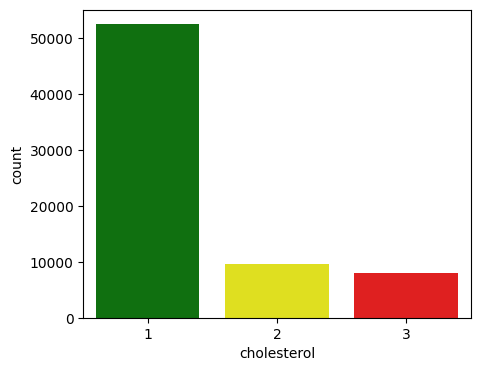

In [ ]:
plt.figure(figsize = (5, 4))
sns.countplot(data = df, x = 'cholesterol', palette = ['green', 'yellow', 'red'])
plt.show()

In [ ]:
gender_count = df['active'].value_counts().sort_index().reset_index()
gender_count.columns = ['Active', 'Frequency']
gender_count

,Active,Frequency
0,0,13739
1,1,14120
2,2,14150
3,3,14007
4,4,13984


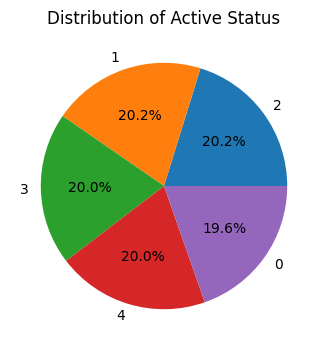

In [ ]:
counts = df['active'].value_counts()
plt.figure(figsize = (5, 4))
plt.pie(counts, labels = counts.index, autopct = '%1.1f%%')
plt.title('Distribution of Active Status')
plt.show()

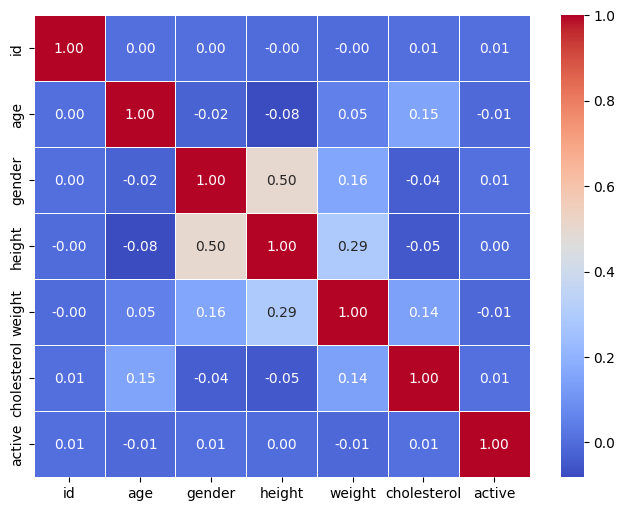

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.show()

In [ ]:
df.to_csv("data_diri.csv", index = False)